Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import skew, kurtosis
df = pd.read_csv("/Airbnb_data - airbnb_data.csv")

# View dataset info
print('Dataset info: ')
print(df.info())


Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified 

In [2]:
# Check for missing values
missing_vals = df.isnull().sum()
print("Missing Values: ")
print(missing_vals[missing_vals>0])


Missing Values: 
bathrooms                   200
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
last_review               15827
neighbourhood              6872
review_scores_rating      16722
thumbnail_url              8216
zipcode                     969
bedrooms                     91
beds                        131
dtype: int64


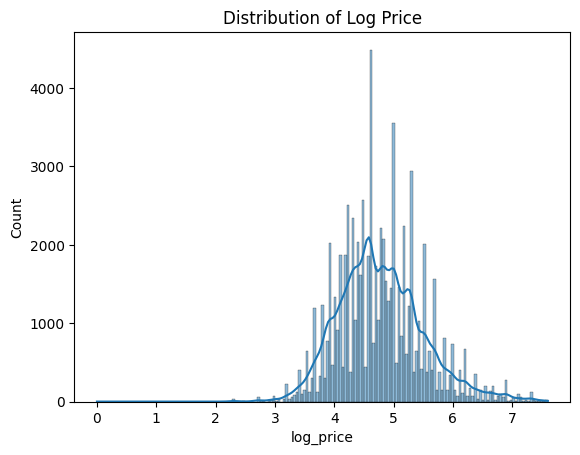

Skewness: 0.5146849957666066
Kurtosis: 0.660482756213777

Interpretation:
- The distribution is positively skewed (right-tailed). This indicates that there are more lower prices and a few high prices.
- The distribution's kurtosis is close to normal (mesokurtic).


In [4]:
# Visualize trends
# Distribution of log_price

sns.histplot(df['log_price'],kde=True)
plt.title('Distribution of Log Price')
plt.show()

# Calculate skewness and kurtosis
skew_val = skew(df['log_price'])
kurt_val = kurtosis(df['log_price'])

print(f"Skewness: {skew_val}")
print(f"Kurtosis: {kurt_val}")

print("\nInterpretation:")
if abs(skew_val) < 0.5:
    print("- The distribution appears approximately symmetric.")
elif skew_val > 0.5:
    print("- The distribution is positively skewed (right-tailed). This indicates that there are more lower prices and a few high prices.")
else:
    print("- The distribution is negatively skewed (left-tailed). This suggests more higher prices and a few lower ones.")


if abs(kurt_val) < 3:  #using a threshold for normal distribution
    print("- The distribution's kurtosis is close to normal (mesokurtic).")
elif kurt_val > 3:
    print("- The distribution is leptokurtic, indicating heavier tails and a sharper peak than a normal distribution.  This suggests a higher likelihood of extreme values (very high or very low prices).")
else:
    print("- The distribution is platykurtic, indicating lighter tails and a flatter peak than a normal distribution. This suggests fewer extreme values compared to a normal distribution.")


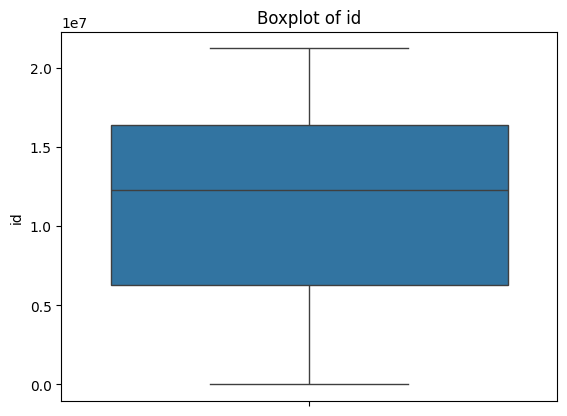


Interpretation of Boxplot for 'id':
- No outliers detected in the 'id' column.
----------------------------------------------------------------------


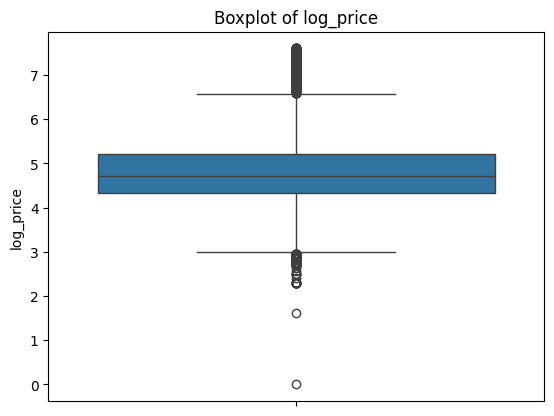


Interpretation of Boxplot for 'log_price':
- Outliers exist in the 'log_price' column.
  - Number of outliers: 1532
  - Lower bound for outliers: 2.9631865474999985
  - Upper bound for outliers: 6.5746573915000015
----------------------------------------------------------------------


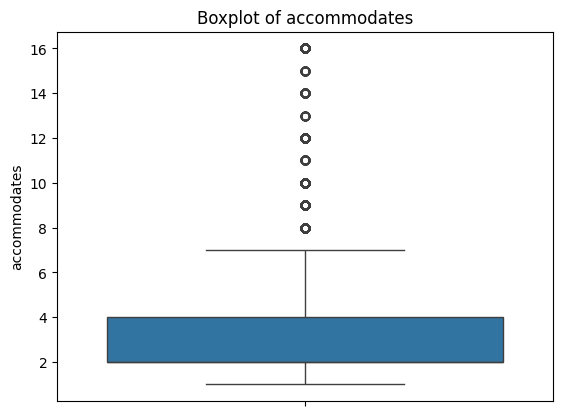


Interpretation of Boxplot for 'accommodates':
- Outliers exist in the 'accommodates' column.
  - Number of outliers: 3604
  - Lower bound for outliers: -1.0
  - Upper bound for outliers: 7.0
----------------------------------------------------------------------


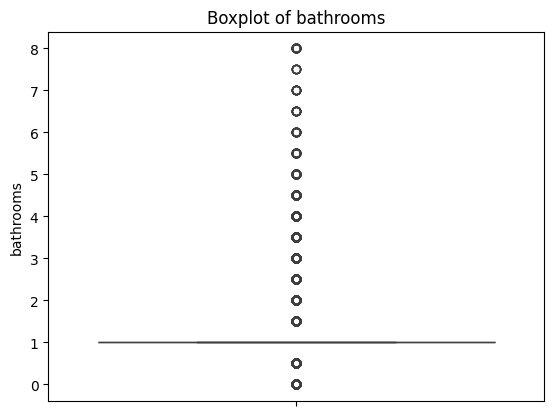


Interpretation of Boxplot for 'bathrooms':
- Outliers exist in the 'bathrooms' column.
  - Number of outliers: 15812
  - Lower bound for outliers: 1.0
  - Upper bound for outliers: 1.0
----------------------------------------------------------------------


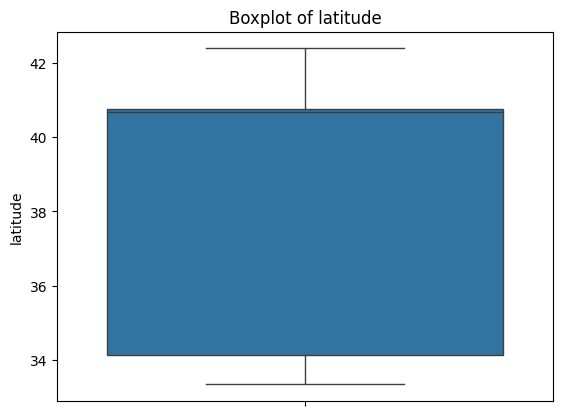


Interpretation of Boxplot for 'latitude':
- No outliers detected in the 'latitude' column.
----------------------------------------------------------------------


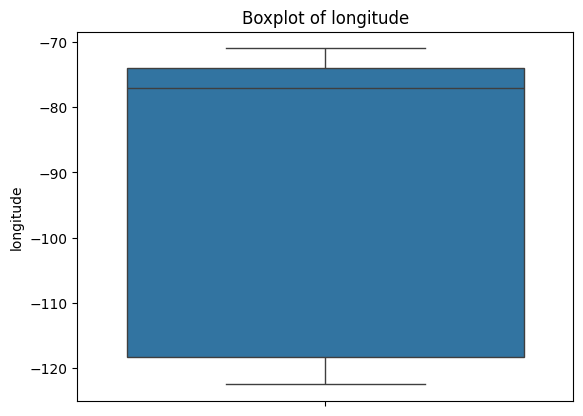


Interpretation of Boxplot for 'longitude':
- No outliers detected in the 'longitude' column.
----------------------------------------------------------------------


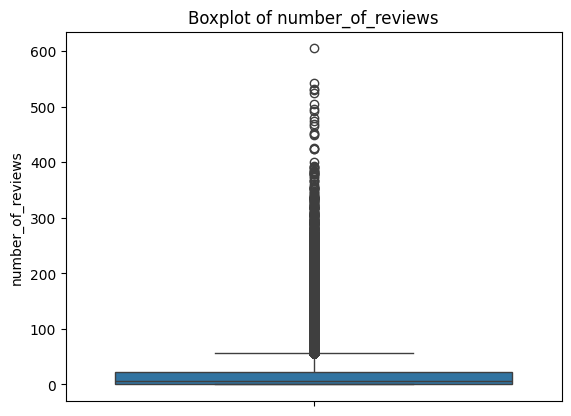


Interpretation of Boxplot for 'number_of_reviews':
- Outliers exist in the 'number_of_reviews' column.
  - Number of outliers: 8203
  - Lower bound for outliers: -32.0
  - Upper bound for outliers: 56.0
----------------------------------------------------------------------


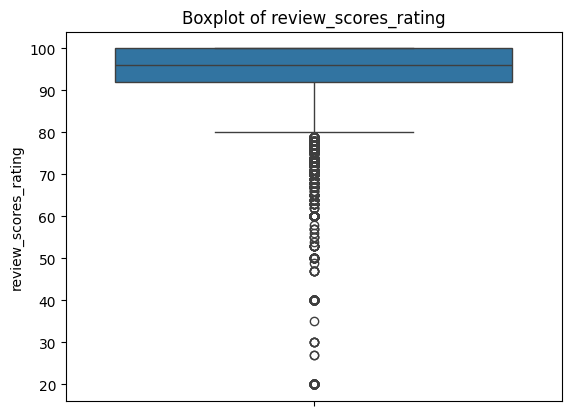


Interpretation of Boxplot for 'review_scores_rating':
- Outliers exist in the 'review_scores_rating' column.
  - Number of outliers: 1719
  - Lower bound for outliers: 80.0
  - Upper bound for outliers: 112.0
----------------------------------------------------------------------


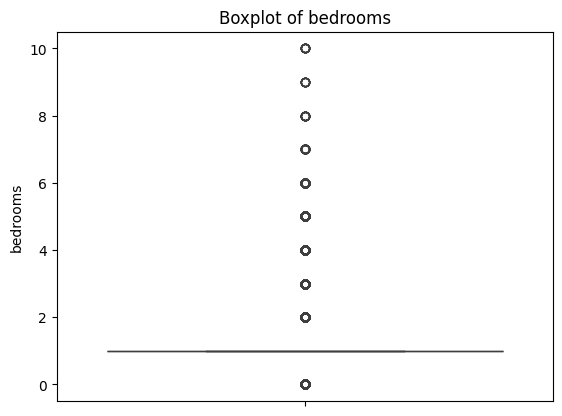


Interpretation of Boxplot for 'bedrooms':
- Outliers exist in the 'bedrooms' column.
  - Number of outliers: 24236
  - Lower bound for outliers: 1.0
  - Upper bound for outliers: 1.0
----------------------------------------------------------------------


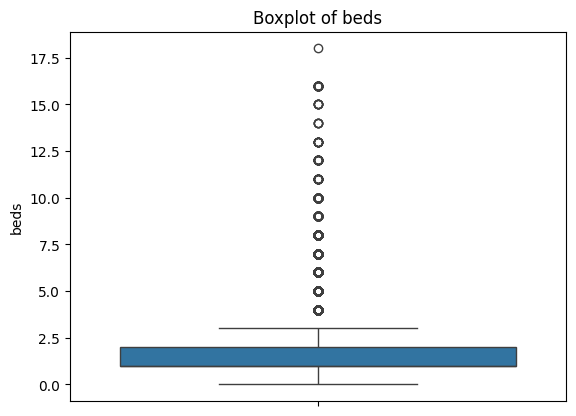


Interpretation of Boxplot for 'beds':
- Outliers exist in the 'beds' column.
  - Number of outliers: 5686
  - Lower bound for outliers: -0.5
  - Upper bound for outliers: 3.5
----------------------------------------------------------------------


In [7]:
# Boxplot to check outliers in numeric columns
numeric_cols = df.select_dtypes(include = ["float64", "int64"]).columns
for col in numeric_cols:
  sns.boxplot(y=df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

  print(f"\nInterpretation of Boxplot for '{col}':")

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  if len(outliers) > 0 :
    print(f"- Outliers exist in the '{col}' column.")
    print(f"  - Number of outliers: {len(outliers)}")
    print(f"  - Lower bound for outliers: {lower_bound}")
    print(f"  - Upper bound for outliers: {upper_bound}")
  else:
    print(f"- No outliers detected in the '{col}' column.")

  print("-" * 70) # Separator between boxplots

In [ ]:
#Filling missing values of bathrooms, bedrooms, bed with median values
df.fillna({
    'bathrooms': df['bathrooms'].median(),
    'bedrooms': df['bedrooms'].median(),
    'beds': df['beds'].median(),
    'host_response_rate': '0%'
}, inplace=True)

#Filling review score rating column with mean score
df['review_scores_rating'] = df['review_scores_rating'].astype(float)
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean().round())


#Replacing empty cells values of Host_identity and host_profile_pic column with False
host_info_col = ['host_identity_verified', 'host_has_profile_pic']
df[host_info_col] = df[host_info_col].replace(['',None],"f")

#Replacing missing dates in 'first_review', 'host_since', 'last_review' columns
date_cols = ['first_review', 'host_since', 'last_review']
df=df.sort_values(by='host_since')
for col in date_cols:
  df[col] = pd.to_datetime(df[col], errors='coerce',dayfirst=True)
  df[col] = df[col].interpolate(method='linear')
  df[col] = df[col].dt.date


#Filling the empty cells of Thumbnail_url column with most frequent Url used in that column
cat_imputer = SimpleImputer(strategy='most_frequent')
df['thumbnail_url']= cat_imputer.fit_transform(df[['thumbnail_url']]).ravel()

In [ ]:
#Filling empty cells of neighbourhood column with values based on its Zip Code
for i in range(len(df)):
  if pd.isna(df.at[i, 'neighbourhood']) and pd.notna(df.at[i,'zipcode']):
    #Find common neighbourhood for the current zip codes
    neighbourhood_from_zipcode = df[df['zipcode'] == df.at[i,'zipcode']]['neighbourhood'].mode()
    if not neighbourhood_from_zipcode.empty:
      df.at[i,'neighbourhood'] = neighbourhood_from_zipcode.iloc[0]

# Fill missing zipcode values based on the most frequent zipcode for a given neighbourhood
for i in range(len(df)):
  if pd.isna(df.at[i,'zipcode']) and pd.notna(df.at[i,'neighbourhood']):
    # Find the most common zipcode for the current neighbourhood
    zipcode_from_neighbourhood = df[df['neighbourhood']==df.at[i,'neighbourhood']]['zipcode'].mode()
    if not zipcode_from_neighbourhood.empty:
      df.at[i,'zipcode'] = zipcode_from_neighbourhood.iloc[0]

# for any remaining NaN values, we can fill them with the most frequent value in each column
df['neighbourhood'] = df['neighbourhood'].fillna(df['neighbourhood'].mode()[0])
df['zipcode']=df['zipcode'].fillna(df['zipcode'].mode()[0])


In [ ]:
# Convert host_response_rate to numeric
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float')

#Remove characters after (-)
df['zipcode'] = df['zipcode'].str.split('-').str[0]

In [ ]:
# Feature engineering
# Neighborhood popularity
neighbourhood_popularity = df['neighbourhood'].value_counts().to_dict()
df['neighbourhood_popularity'] = df['neighbourhood'].map(neighbourhood_popularity)

#Number of amenties:
df['amenties_count'] = df['amenities'].apply(lambda x: len(x.split(',')))

#Host Activity metric:
df['host_review_duration'] = abs(df['last_review'] - df['host_since'])
df['host_review_duration'] = df['host_review_duration'].apply(lambda x: x.days)


In [ ]:
#Using Label Encoder to convert following column values to Binary
label_encoder_columns = ['cancellation_policy', 'cleaning_fee', 'host_has_profile_pic', 'host_identity_verified','instant_bookable']
label_encoder = LabelEncoder()
for col in label_encoder_columns:
  df[col] = label_encoder.fit_transform(df[col])

df.to_csv("cleaned_Airbnb_data.csv", index=False)

print("\nData cleaning and transformations are complete. Cleaned dataset saved as 'cleaned_Airbnb_data.csv'.")


Data cleaning and transformations are complete. Cleaned dataset saved as 'cleaned_Airbnb_data.csv'.
